# Predictive Modeling - Random Forest

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
%matplotlib inline
sns.set(style="darkgrid")

# Function for displaying all columns
def display_all(df):
    with pd.option_context("display.max_rows", 1000): 
        with pd.option_context("display.max_columns", 1000): 
            display(df)
            
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix

# Function for plotting the confusion matrix
def plot_confusion_matrix(cnf_mtx, model_name='Model'):
    fig, ax = plt.subplots(figsize=(6, 6))
    title = model_name + ' Confusion Matrix'
    ax = sns.heatmap(cnf_mtx, annot=True, fmt="d", cbar=False, cmap='Blues', square=True)
    ax = ax.set(title=title, xlabel='Predicted Label', ylabel='True Label')

# Function for plotting ROC with AUC
def plot_roc_curve(actuals, probs, model_name='Model'):
    """ Function takes a8998l,llctual Y labels and prediciton probabilities for 
        both classes. Function uses these to plot ROC-curves and AUC.
    """
    # Calculating true and false positive rates
    fpr, tpr, _ = roc_curve(actuals.values.ravel(), probs[:,1])
    
    # Calculating AUC
    auc = roc_auc_score(actuals.values.ravel(), probs[:,1])
    
    # Create plot legend with AUC metric
    label = model_name + ', AUC: %.3f' % auc
    
    # Plot the roc curve for the model
    plt.figure(figsize=(10,10))
    plt.plot(fpr, tpr, label=label)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

In [2]:
# Reading data 
trainX = pd.read_csv('../data/trainX.csv')
trainY = pd.read_csv('../data/trainY.csv')
validX = pd.read_csv('../data/validX.csv')
validY = pd.read_csv('../data/validY.csv')

print(trainX.shape, trainY.shape, validX.shape, validY.shape)
display_all(trainX.head(10).transpose())

(31647, 48) (31647, 1) (6782, 48) (6782, 1)


,0,1,2,3,4,5,6,7,8,9
age,36,56,46,41,38,33,43,61,36,47
default,0,0,0,0,0,0,0,0,0,0
balance,0,196,0,3426,0,839,429,938,2415,1152
housing,0,0,1,0,1,1,1,0,1,0
loan,0,0,0,0,0,0,0,0,0,0
day,17,19,5,1,20,28,27,15,22,7
duration,153,312,83,302,90,469,222,212,73,260
campaign,4,3,2,1,1,3,4,2,1,13
pdays,-1,-1,-1,119,-1,-1,-1,92,86,-1
previous,0,0,0,5,0,0,0,5,4,0


In [3]:
# Random Forest Classifier
RFC = RandomForestClassifier()

# training the classifier with training variables
RFC.fit(trainX,trainY.values.ravel())

#prediction
predY=RFC.predict(validX)
probs = RFC.predict_proba(validX)

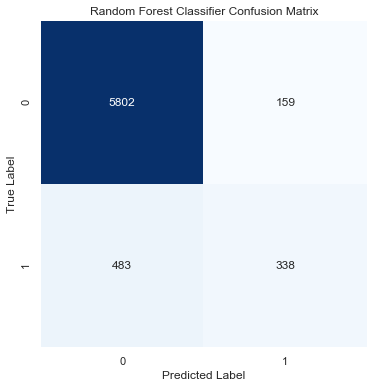

In [7]:
#confusion matrix

CM = confusion_matrix(validY, predY)
plot_confusion_matrix(CM, model_name='Random Forest Classifier')

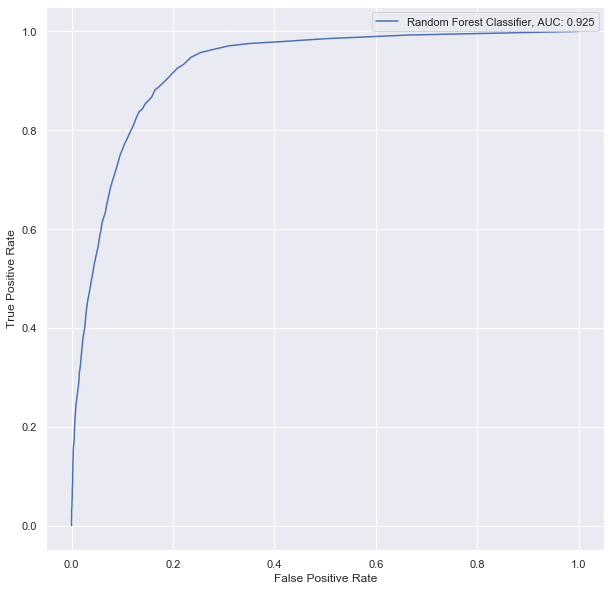

In [4]:
# ROC curve + AUC

plot_roc_curve(validY, probs, model_name='Random Forest Classifier')

Testing same Random Forest Classifier with balanced training data set

In [5]:
#reading balanced data
trainX_b = pd.read_csv('../data/balanced_trainX.csv')
trainY_b = pd.read_csv('../data/balanced_trainY.csv')
validX = pd.read_csv('../data/validX.csv')
validY = pd.read_csv('../data/validY.csv')

print(trainX_b.shape, trainY_b.shape, validX.shape, validY.shape)
display_all(trainX_b.head(10).transpose())

(55912, 48) (55912, 1) (6782, 48) (6782, 1)


,0,1,2,3,4,5,6,7,8,9
age,36,56,46,41,38,33,43,61,36,47
default,0,0,0,0,0,0,0,0,0,0
balance,0,196,0,3426,0,839,429,938,2415,1152
housing,0,0,1,0,1,1,1,0,1,0
loan,0,0,0,0,0,0,0,0,0,0
day,17,19,5,1,20,28,27,15,22,7
duration,153,312,83,302,90,469,222,212,73,260
campaign,4,3,2,1,1,3,4,2,1,13
pdays,-1,-1,-1,119,-1,-1,-1,92,86,-1
previous,0,0,0,5,0,0,0,5,4,0


In [6]:
# Random Forest Classifier
RFC = RandomForestClassifier()

# training the classifier with new balanced training set
RFC.fit(trainX_b,trainY_b.values.ravel())

#prediction
predY=RFC.predict(validX)
probs = RFC.predict_proba(validX)

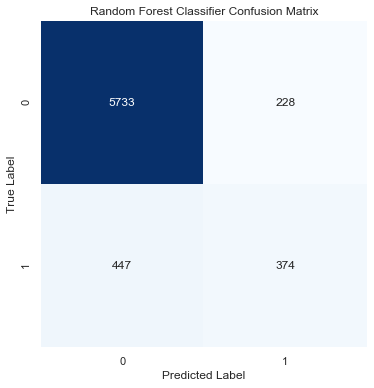

In [14]:
#confusion matrix with balanced data

CM = confusion_matrix(validY, predY)
plot_confusion_matrix(CM, model_name='Random Forest Classifier')

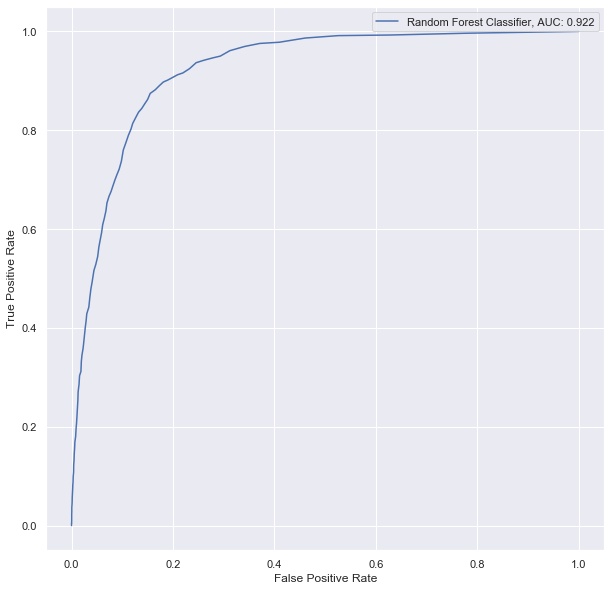

In [7]:
# balanced ROC curve + AUC

plot_roc_curve(validY, probs, model_name='Random Forest Classifier')

In [8]:
#Tuning hyperparameters for the unbalanced training data
# Random Forest Classifier
RFC = RandomForestClassifier()

# training the classifier with training variables
RFC.fit(trainX,trainY.values.ravel())


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [15]:
n_estimators = [50, 100, 300, 500, 1000]

hyperP = dict(n_estimators = n_estimators)

#Grid search with 3-fold cross-validation
grid = GridSearchCV(RandomForestClassifier(), hyperP, cv = 3, scoring='roc_auc', n_jobs = -1)
grid.fit(trainX, trainY.values.ravel())

print('Best score: ' + '%.3f' % grid.best_score_ + ' with hyperparameters: ' + '%s' % grid.best_params_)

Best score: 0.929 with hyperparameters: {'n_estimators': 1000}


In [16]:
max_depth = [5, 10, 20, 25, 50]

hyperP = dict(max_depth = max_depth)

#Grid search with 3-fold cross-validation
grid = GridSearchCV(RandomForestClassifier(n_estimators=1000), hyperP, cv = 3, scoring='roc_auc', n_jobs = -1)
grid.fit(trainX, trainY.values.ravel())

print('Best score: ' + '%.3f' % grid.best_score_ + ' with hyperparameters: ' + '%s' % grid.best_params_)

Best score: 0.929 with hyperparameters: {'max_depth': 20}


In [17]:
min_samples_split = [2, 10, 15, 50, 100]

hyperP = dict(min_samples_split = min_samples_split)

#Grid search with 3-fold cross-validation
grid = GridSearchCV(RandomForestClassifier(n_estimators=1000, max_depth=20), hyperP, cv = 3, scoring='roc_auc', n_jobs = -1)
grid.fit(trainX, trainY.values.ravel())

print('Best score: ' + '%.3f' % grid.best_score_ + ' with hyperparameters: ' + '%s' % grid.best_params_)

Best score: 0.930 with hyperparameters: {'min_samples_split': 10}


In [18]:
min_samples_leaf = [1, 2, 3, 5, 10]

hyperP = dict(min_samples_leaf = min_samples_leaf)

#Grid search with 3-fold cross-validation
grid = GridSearchCV(RandomForestClassifier(n_estimators=1000, max_depth=20, min_samples_split=10), hyperP, cv = 3, scoring='roc_auc', n_jobs = -1)
grid.fit(trainX, trainY.values.ravel())

print('Best score: ' + '%.3f' % grid.best_score_ + ' with hyperparameters: ' + '%s' % grid.best_params_)

Best score: 0.930 with hyperparameters: {'min_samples_leaf': 1}


In [19]:
#Testing with tuned hyperparameters on validation data set
# Random Forest Classifier
RFC = RandomForestClassifier(n_estimators=1000, max_depth=20, min_samples_split=10, min_samples_leaf=1)

# training the classifier
RFC.fit(trainX,trainY.values.ravel())

#prediction
predY = RFC.predict(validX)
probs = RFC.predict_proba(validX)

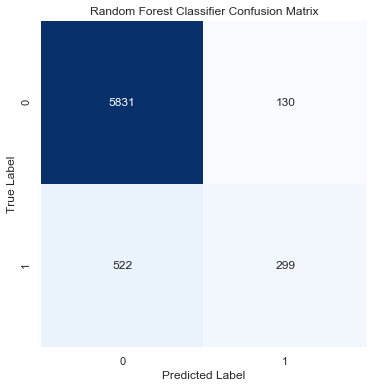

In [20]:
#confusion matrix
CM = confusion_matrix(validY, predY)
plot_confusion_matrix(CM, model_name='Random Forest Classifier')

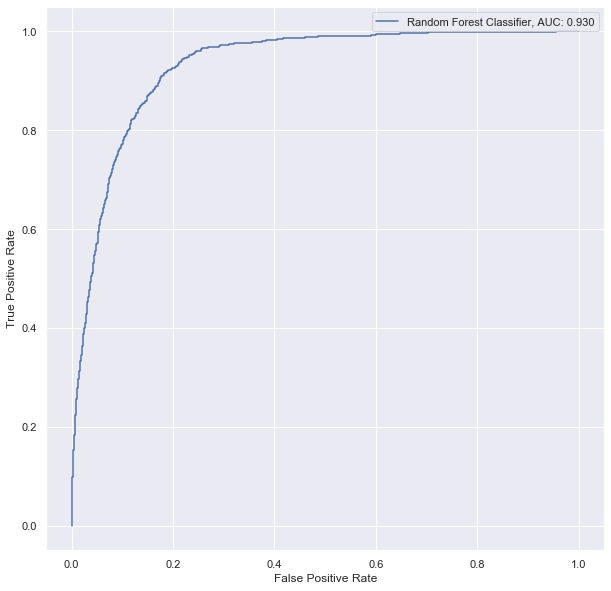

In [21]:
# ROC curve + AUC

plot_roc_curve(validY, probs, model_name='Random Forest Classifier')

Hyperparameter tuning increased AUC value (0.925 to 0.930) but the increase is not very significant.